### Carga de dataset

In [1]:
#Importe de libreiras
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt
%matplotlib inline 

In [2]:
df = pd.read_csv('../data/processed/ames_processed.csv')
df_ames = pd.DataFrame(df)
df_ames = df_ames.iloc[: , 1:]
df_ames

,SalePrice,Lot.Area,Gr.Liv.Area,Heating.QC,Central.Air
0,215000,31770,1656,Tipico_pobre,SI
1,105000,11622,896,Tipico_pobre,SI
2,172000,14267,1329,Tipico_pobre,SI
3,244000,11160,2110,Excelente,SI
4,189900,13830,1629,Bueno,SI
...,...,...,...,...,...
2925,142500,7937,1003,Tipico_pobre,SI
2926,131000,8885,902,Tipico_pobre,SI
2927,132000,10441,970,Tipico_pobre,SI
2928,170000,10010,1389,Bueno,SI


### Analisis del dataset

In [3]:
df_ames.describe()

,SalePrice,Lot.Area,Gr.Liv.Area
count,2930.000000,2930.000000,2930.000000
mean,180796.060068,10147.921843,1499.690444
std,79886.692357,7880.017759,505.508887
min,12789.000000,1300.000000,334.000000
25%,129500.000000,7440.250000,1126.000000
50%,160000.000000,9436.500000,1442.000000
75%,213500.000000,11555.250000,1742.750000
max,755000.000000,215245.000000,5642.000000


### Histogramas

- Nos damos cuenta en el Precio de venta su sesgo que es a la derecha, indicando la media tiene un valor mayor que la mediana 

C:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


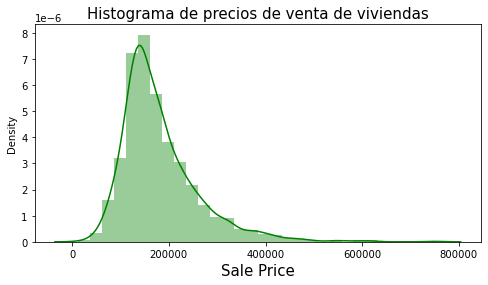

In [4]:

fig, ax = plt.subplots(figsize=(8,4))
sns.distplot(df_ames.SalePrice, bins=30, color='green')
plt.title('Histograma de precios de venta de viviendas', fontsize=15)
plt.xlabel('Sale Price', fontsize=15);

### Diagrama de dispersión y correlaciones

- En los siguientes diagramas de dispersión de estas variables hay varias observaciones, los cuales no da una impresion de tener una relacion lineal entre SalesPrice y GrLivArea. Eso nos muestra en la correlación de mas abajo.

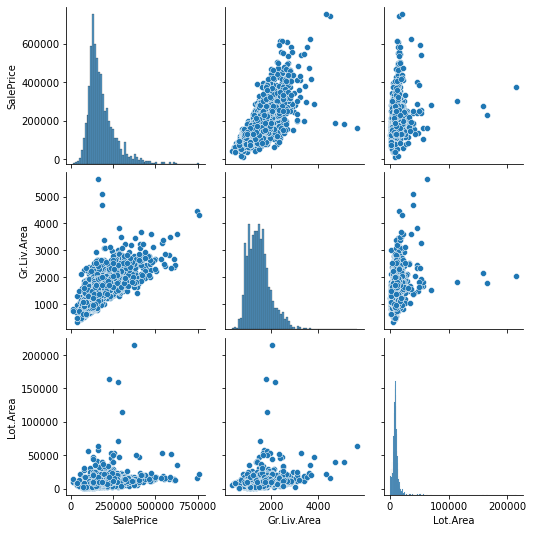

In [5]:
sns.pairplot(df_ames[['SalePrice','Gr.Liv.Area', 'Lot.Area']])

In [6]:
df_correlacion = df_ames.corr()
df_correlacion

,SalePrice,Lot.Area,Gr.Liv.Area
SalePrice,1.000000,0.266549,0.706780
Lot.Area,0.266549,1.000000,0.285599
Gr.Liv.Area,0.706780,0.285599,1.000000


### Variables para Modelo de regresión Lineal Multiple

- Se agregaran variables Dummy para porder ejecutar el modelo de regresión Lineal multiple, ya que con variables categoricas no se podria.

In [7]:
# función get_summies de pandas
df = pd.get_dummies(df_ames).values

In [8]:
df

array([[215000,  31770,   1656, ...,      1,      0,      1],
       [105000,  11622,    896, ...,      1,      0,      1],
       [172000,  14267,   1329, ...,      1,      0,      1],
       ...,
       [132000,  10441,    970, ...,      1,      0,      1],
       [170000,  10010,   1389, ...,      0,      0,      1],
       [188000,   9627,   2000, ...,      0,      0,      1]], dtype=int64)

In [9]:
X = df[:, 1:]
X

array([[31770,  1656,     0, ...,     1,     0,     1],
       [11622,   896,     0, ...,     1,     0,     1],
       [14267,  1329,     0, ...,     1,     0,     1],
       ...,
       [10441,   970,     0, ...,     1,     0,     1],
       [10010,  1389,     1, ...,     0,     0,     1],
       [ 9627,  2000,     0, ...,     0,     0,     1]], dtype=int64)

In [10]:
print(X[0])

[31770  1656     0     0     1     0     1]


In [11]:
y = df[:, 0]
y

array([215000, 105000, 172000, ..., 132000, 170000, 188000], dtype=int64)

In [12]:
print(y[0])

215000


### Separación de data para Train y Test

In [13]:
from sklearn import metrics
from sklearn.model_selection import train_test_split

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3 , random_state = 0)

In [15]:
X_train

array([[12198,  1411,     0, ...,     1,     0,     1],
       [ 8789,   941,     0, ...,     1,     0,     1],
       [10650,   894,     0, ...,     1,     0,     1],
       ...,
       [11584,  1725,     0, ...,     1,     0,     1],
       [13400,  1086,     0, ...,     1,     0,     1],
       [ 9375,  1350,     0, ...,     0,     0,     1]], dtype=int64)

In [16]:
y_train

array([130000, 129200, 128200, ..., 197000, 159950, 146000], dtype=int64)

### Aplicación del Modelo Regresión Lineal Multiple

In [17]:
from sklearn.linear_model import LinearRegression
reg_mul = LinearRegression()
reg_mul.fit(X_train,y_train)

LinearRegression()

In [18]:
ypred = reg_mul.predict(X_test)
ypred

array([206721.10960034, 157443.84236708, 249071.19287518, 167880.27919578,
       135848.66340522, 213132.17064422,  55498.69302681, 112907.82565996,
       165005.60426361, 137197.00432074, 183989.48466347, 119685.87457562,
       249114.33766186, 157121.76782281, 218142.24826269, 122221.85847621,
       172065.97571246, 144160.65022168, 202602.43060728, 225291.25365339,
       176263.22769427, 299323.99255762, 201517.64983279, 206441.78549936,
       225055.85104319, 132950.26989061, 257999.53157433, 214749.66941298,
       200052.19170653, 273718.23176157, 180176.72891039, 255422.42632633,
       144155.51801965, 100535.50992727, 174821.54928092, 197004.34737838,
       204359.54712861, 173042.12053933, 256021.10311655, 174285.365355  ,
       216248.43142253, 164643.47167645, 282462.97949872, 223364.87022523,
       272634.48200435, 260554.30745729, 111246.25382045, 186093.57234497,
       134888.00563395, 252773.7863049 , 114548.7878154 , 154057.43658141,
       183020.15258197, 2

In [19]:
r2 = reg_mul.score(X,y)
print(r2)

0.5934757768982397


In [20]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
import statsmodels.formula.api as smf

X_train = sm.add_constant(X_train, prepend=True)
modelo = sm.OLS(endog=y_train, exog=X_train,)
modelo = modelo.fit()
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.587
Model:                            OLS   Adj. R-squared:                  0.586
Method:                 Least Squares   F-statistic:                     580.9
Date:                Mon, 17 Oct 2022   Prob (F-statistic):               0.00
Time:                        01:48:47   Log-Likelihood:                -25117.
No. Observations:                2051   AIC:                         5.025e+04
Df Residuals:                    2045   BIC:                         5.028e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4980.2275   2236.157      2.227      0.0

### Regresión Lineal Simple

In [21]:
#Variable X será el Ge.Liv.Area el cual es eleguimos por su mayor correlación
X2 = df_ames.iloc[:,2].values
X2 = X2.reshape(-1, 1)
X2

array([[1656],
       [ 896],
       [1329],
       ...,
       [ 970],
       [1389],
       [2000]], dtype=int64)

In [22]:
#Variable a predecir 'SalesPrice' el valor de la vivienda.
y2 = df_ames.iloc[:,0].values
y2 = y2.reshape(-1, 1)
y2

array([[215000],
       [105000],
       [172000],
       ...,
       [132000],
       [170000],
       [188000]], dtype=int64)

### Separación de data para Train y Test


In [23]:
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X2, y2, test_size = 0.3, random_state = 0)

### Entrenamiento de datos Regresión Lineal Simple

In [24]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train_2, y_train_2)

LinearRegression()

In [25]:
y_pred_2 = regressor.predict(X_test_2)

In [26]:
y_pred_2

array([[236707.58319571],
       [124472.0612039 ],
       [234352.99182525],
       [140617.83060132],
       [145551.26013943],
       [193876.4449331 ],
       [102832.24527541],
       [123462.95061656],
       [177842.79893427],
       [148466.46850285],
       [160575.79555092],
       [135572.27766463],
       [235249.979014  ],
       [177730.67553568],
       [201164.46584166],
       [139832.96681117],
       [150708.93647471],
       [110344.51298116],
       [180421.63710191],
       [264626.30944542],
       [154296.8852297 ],
       [296693.60144308],
       [223364.89876312],
       [239959.16175491],
       [208228.23995303],
       [148017.97490848],
       [243771.35730708],
       [234689.36202103],
       [172460.8758018 ],
       [303757.37555445],
       [159454.56156498],
       [244556.22109723],
       [110344.51298116],
       [113708.21493895],
       [153175.65124376],
       [208788.856946  ],
       [183224.72206675],
       [150708.93647471],
       [2987

In [27]:
r2_LS = regressor.score(X2,y2)
print("Valor de R2: ")
print(r2_LS)

Valor de R2: 
0.499423987926232
